In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

plt.rcParams['figure.figsize'] = (16, 9)

In [89]:
# Load the production data
df_power=pd.read_excel('RE_SolarProductionWeatherCase.xlsx', sheet_name='Solar Production Calgary, CA')
df_power.head()

,Date and time of solar production,Kilowatt-hours of solar production
0,2017-02-13 09:45:00,0.564
1,2017-02-13 10:45:00,17.131
2,2017-02-13 11:45:00,48.468
3,2017-02-13 12:45:00,76.175
4,2017-02-13 13:45:00,79.399


In [90]:
df_power.isnull().sum()

Date and time of solar production     0
Kilowatt-hours of solar production    0
dtype: int64

In [91]:
df_power.describe()

,Kilowatt-hours of solar production
count,23756.000000
mean,135.832775
std,6488.161567
min,0.001000
25%,8.940500
50%,52.665500
75%,168.207250
max,999999.000000


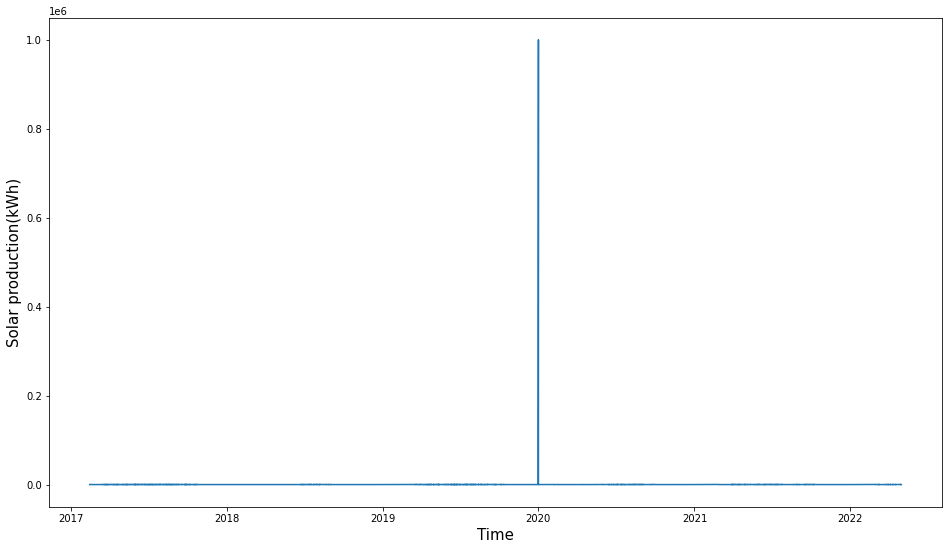

In [92]:

plt.plot(df_power['Date and time of solar production'], df_power['Kilowatt-hours of solar production'])
plt.xlabel('Time',fontsize=15)
plt.ylabel('Solar production(kWh)',fontsize=15)
plt.show()


In [93]:
df_power['Kilowatt-hours of solar production'].argmax()

13302

In [94]:
# Remove the repeated row that was an outlier
df_power.drop(df_power.index[df_power['Kilowatt-hours of solar production'].argmax()], inplace=True)
df_power.describe()

,Kilowatt-hours of solar production
count,23755.000000
mean,93.742134
std,97.918825
min,0.001000
25%,8.939000
50%,52.659000
75%,168.196500
max,369.056000


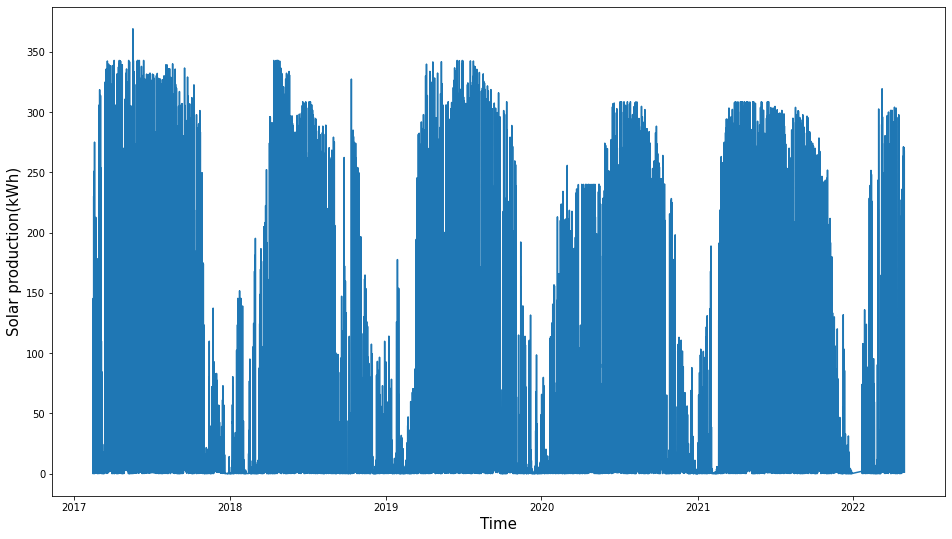

In [95]:
plt.plot(df_power['Date and time of solar production'], df_power['Kilowatt-hours of solar production'])
plt.xlabel('Time',fontsize=15)
plt.ylabel('Solar production(kWh)',fontsize=15)
plt.show()

In [96]:
df_power['date']= df_power['Date and time of solar production'].dt.date

In [97]:
#calculate the solar production for each day
df_power_per_day=df_power.groupby('date').sum()
df_power_per_day

,Kilowatt-hours of solar production
date,
2017-02-13,336.903
2017-02-14,677.414
2017-02-15,799.390
2017-02-16,1140.197
2017-02-17,1399.423
...,...
2022-04-26,734.410
2022-04-27,2016.058
2022-04-28,2030.739


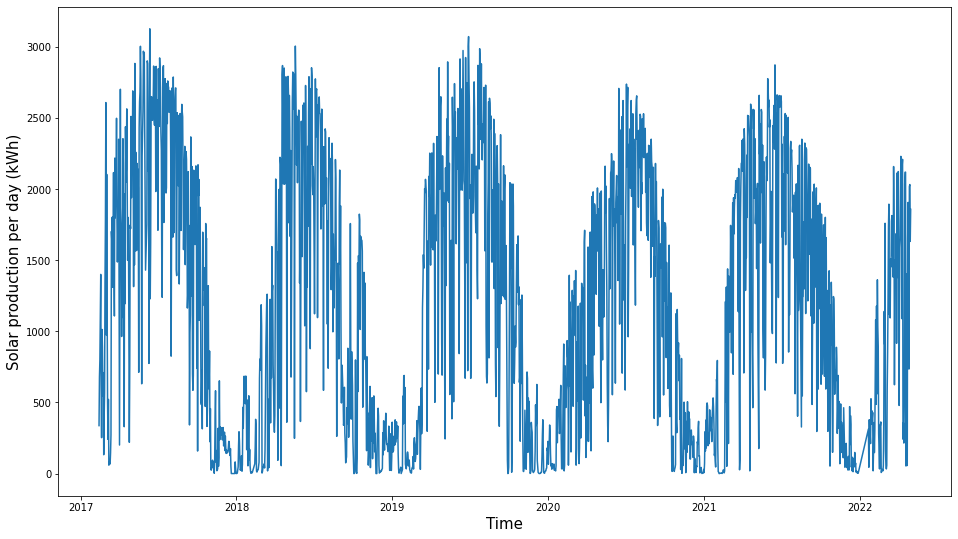

In [98]:
plt.plot( df_power_per_day['Kilowatt-hours of solar production'])
plt.xlabel('Time',fontsize=15)
plt.ylabel('Solar production per day (kWh)',fontsize=15)
plt.show()

In [99]:
#Load weather data for Calgary
df_weather=pd.read_excel('RE_SolarProductionWeatherCase.xlsx', sheet_name='Weather Calgary, CA')
df_weather.head()

,date,dayl,prcp,srad,swe,tmax,tmin,vp
0,2017-01-01,27971.22,1.40,119.06,25.38,-8.53,-18.44,142.83
1,2017-01-02,28038.02,0.00,116.32,25.38,-16.77,-26.11,72.43
2,2017-01-03,28110.20,0.00,116.44,25.38,-15.87,-25.11,79.37
3,2017-01-04,28187.71,0.00,130.66,25.38,-8.50,-19.80,127.01
4,2017-01-05,28270.48,0.89,135.91,26.26,-4.37,-16.55,167.62


In [100]:
df_weather.isnull().sum()

date    0
dayl    0
prcp    0
srad    0
swe     0
tmax    0
tmin    0
vp      0
dtype: int64

In [101]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1825 non-null   datetime64[ns]
 1   dayl    1825 non-null   float64       
 2   prcp    1825 non-null   float64       
 3   srad    1825 non-null   float64       
 4   swe     1825 non-null   float64       
 5   tmax    1825 non-null   float64       
 6   tmin    1825 non-null   float64       
 7   vp      1825 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 114.2 KB


In [102]:
df_weather.describe()

,dayl,prcp,srad,swe,tmax,tmin,vp
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,43200.182795,1.126175,275.760203,5.718460,10.573041,-2.269923,540.696608
std,10711.427611,3.456038,133.971555,11.631635,12.288523,10.229993,357.579658
min,27607.170000,0.000000,32.440000,0.000000,-27.050000,-35.860000,28.400000
25%,32841.140000,0.000000,149.330000,0.000000,2.430000,-8.360000,255.550000
50%,43199.740000,0.000000,268.260000,0.000000,11.320000,-1.460000,447.050000
75%,53560.160000,0.480000,395.170000,6.320000,20.610000,6.230000,792.920000
max,58792.820000,43.400000,577.740000,61.400000,37.320000,17.640000,2017.170000


In [103]:
df_weather['date']=df_weather.date.dt.date

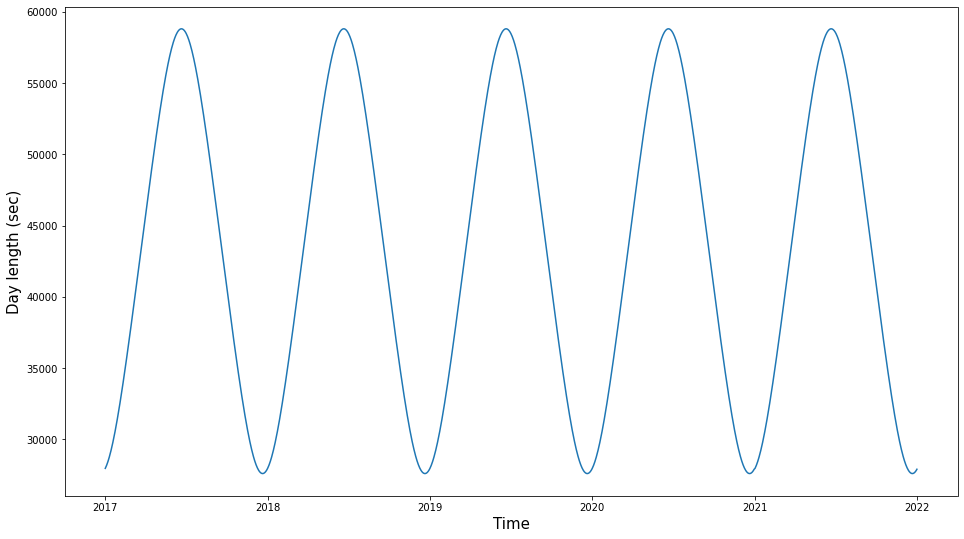

In [104]:
plt.plot(df_weather['date'], df_weather['dayl'])
plt.xlabel('Time',fontsize=15)
plt.ylabel('Day length (sec)',fontsize=15)
plt.show()

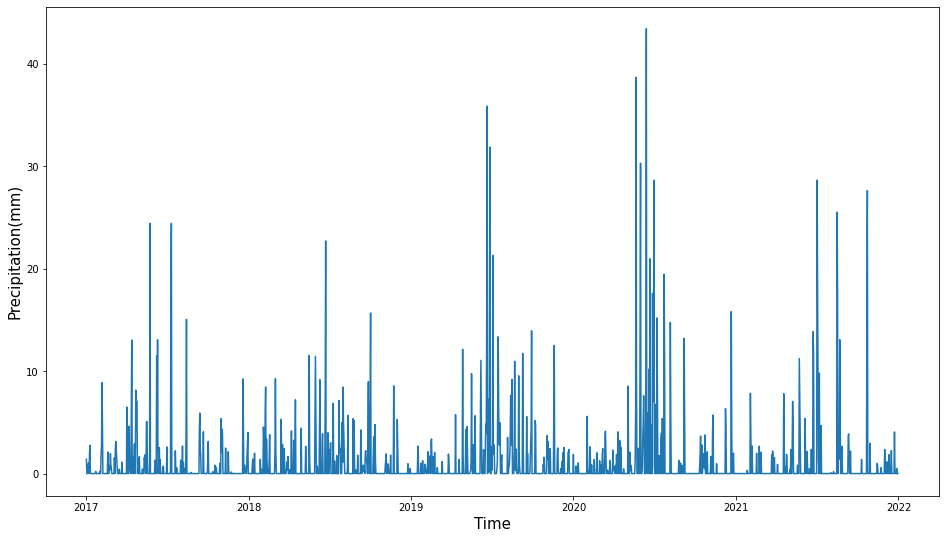

In [105]:
plt.plot(df_weather['date'], df_weather['prcp'])
plt.xlabel('Time',fontsize=15)
plt.ylabel('Precipitation(mm)',fontsize=15)
plt.show()

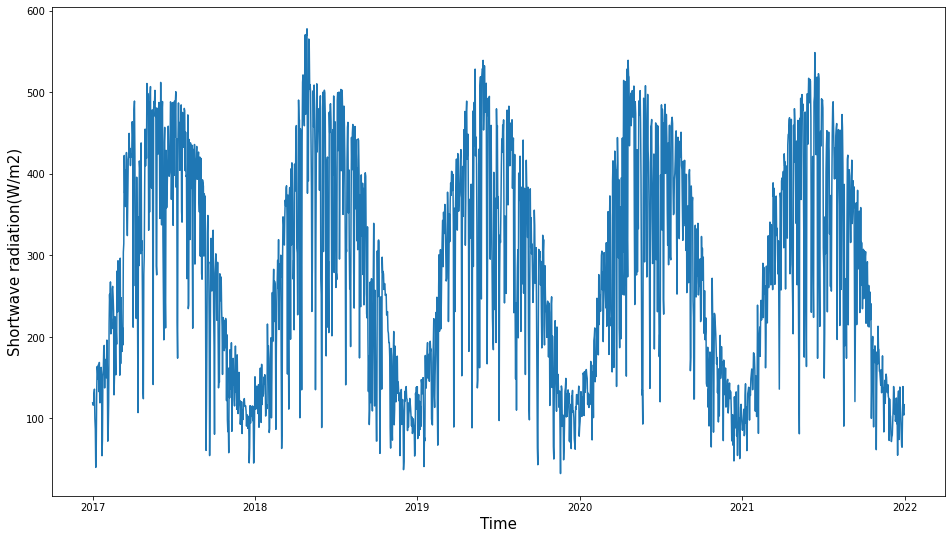

In [106]:
plt.plot(df_weather['date'], df_weather['srad'])
plt.xlabel('Time',fontsize=15)
plt.ylabel('Shortwave radiation(W/m2)',fontsize=15)
plt.show()

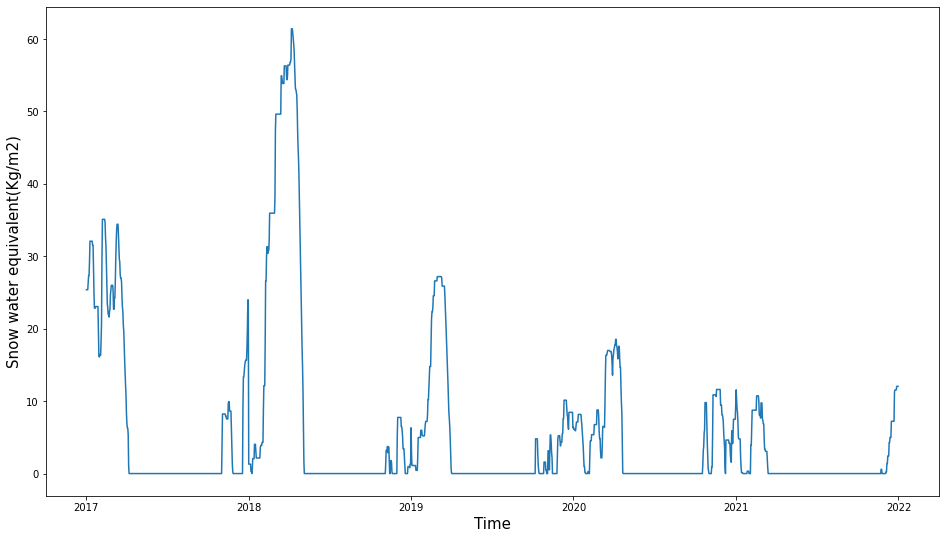

In [107]:
plt.plot(df_weather['date'], df_weather['swe'])
plt.xlabel('Time',fontsize=15)  
plt.ylabel('Snow water equivalent(Kg/m2)',fontsize=15)
plt.show()

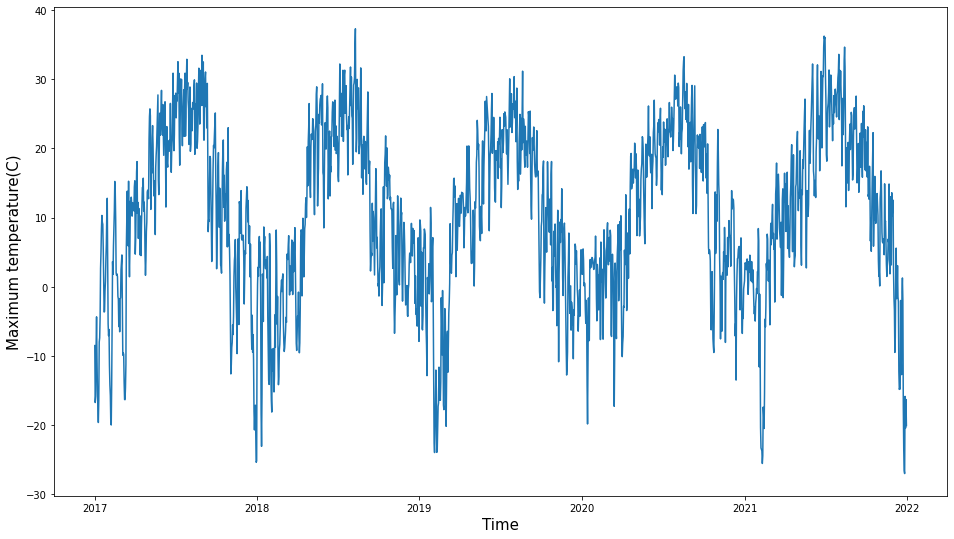

In [108]:
plt.plot(df_weather['date'], df_weather['tmax'])
plt.xlabel('Time',fontsize=15)
plt.ylabel('Maximum temperature(C)',fontsize=15)
plt.show()

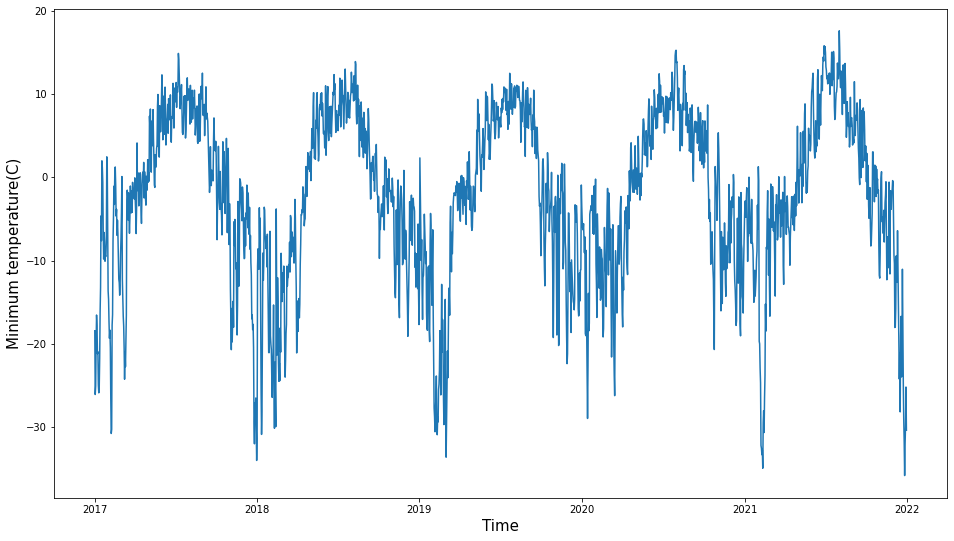

In [109]:
plt.plot(df_weather['date'], df_weather['tmin'])
plt.xlabel('Time',fontsize=15)
plt.ylabel('Minimum temperature(C)',fontsize=15)
plt.show()

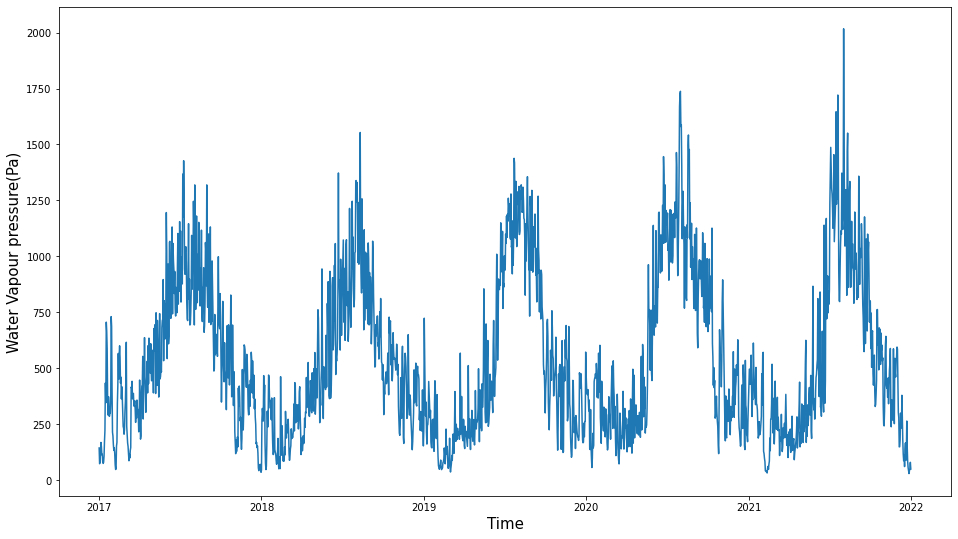

In [110]:
plt.plot(df_weather['date'], df_weather['vp'])
plt.xlabel('Time',fontsize=15)
plt.ylabel('Water Vapour pressure(Pa)',fontsize=15)
plt.show()

In [111]:
df_merged = pd.merge(df_weather,df_power_per_day,on='date',  how="inner")
df_merged.head()

,date,dayl,prcp,srad,swe,tmax,tmin,vp,Kilowatt-hours of solar production
0,2017-02-13,34604.36,0.0,210.03,32.55,8.54,-1.05,565.58,336.903
1,2017-02-14,34820.33,0.0,258.83,31.40,11.00,-3.25,449.92,677.414
2,2017-02-15,35037.82,0.0,261.97,28.63,15.23,0.59,556.14,799.390
3,2017-02-16,35256.77,0.0,249.25,25.58,13.85,1.26,599.58,1140.197
4,2017-02-17,35477.11,0.0,232.22,23.43,9.74,-0.88,547.63,1399.423


In [112]:

#write df_merged to csv
df_merged.to_csv('df_merged1.csv')


In [113]:
# Add a column for the temperature difference
df_merged['dt']=df_merged['tmax']-df_merged['tmin']
df_merged.describe()

,dayl,prcp,srad,swe,tmax,tmin,vp,Kilowatt-hours of solar production,dt
count,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000
mean,43585.543558,1.121507,279.744499,5.145297,11.069099,-1.834799,550.612334,1206.619931,12.903898
std,10636.163909,3.470537,133.661318,11.240971,12.036362,9.946726,357.483292,918.558334,4.612233
min,27607.170000,0.000000,37.200000,0.000000,-27.050000,-35.860000,28.400000,0.012000,1.500000
25%,33447.790000,0.000000,152.300000,0.000000,2.970000,-7.810000,263.190000,296.875000,9.510000
50%,43919.330000,0.000000,274.740000,0.000000,11.790000,-1.060000,458.550000,1194.564000,12.740000
75%,53855.160000,0.460000,398.360000,5.230000,20.800000,6.500000,801.750000,2030.809000,16.290000
max,58792.820000,43.400000,577.740000,61.400000,37.320000,17.640000,2017.170000,3124.982000,26.590000


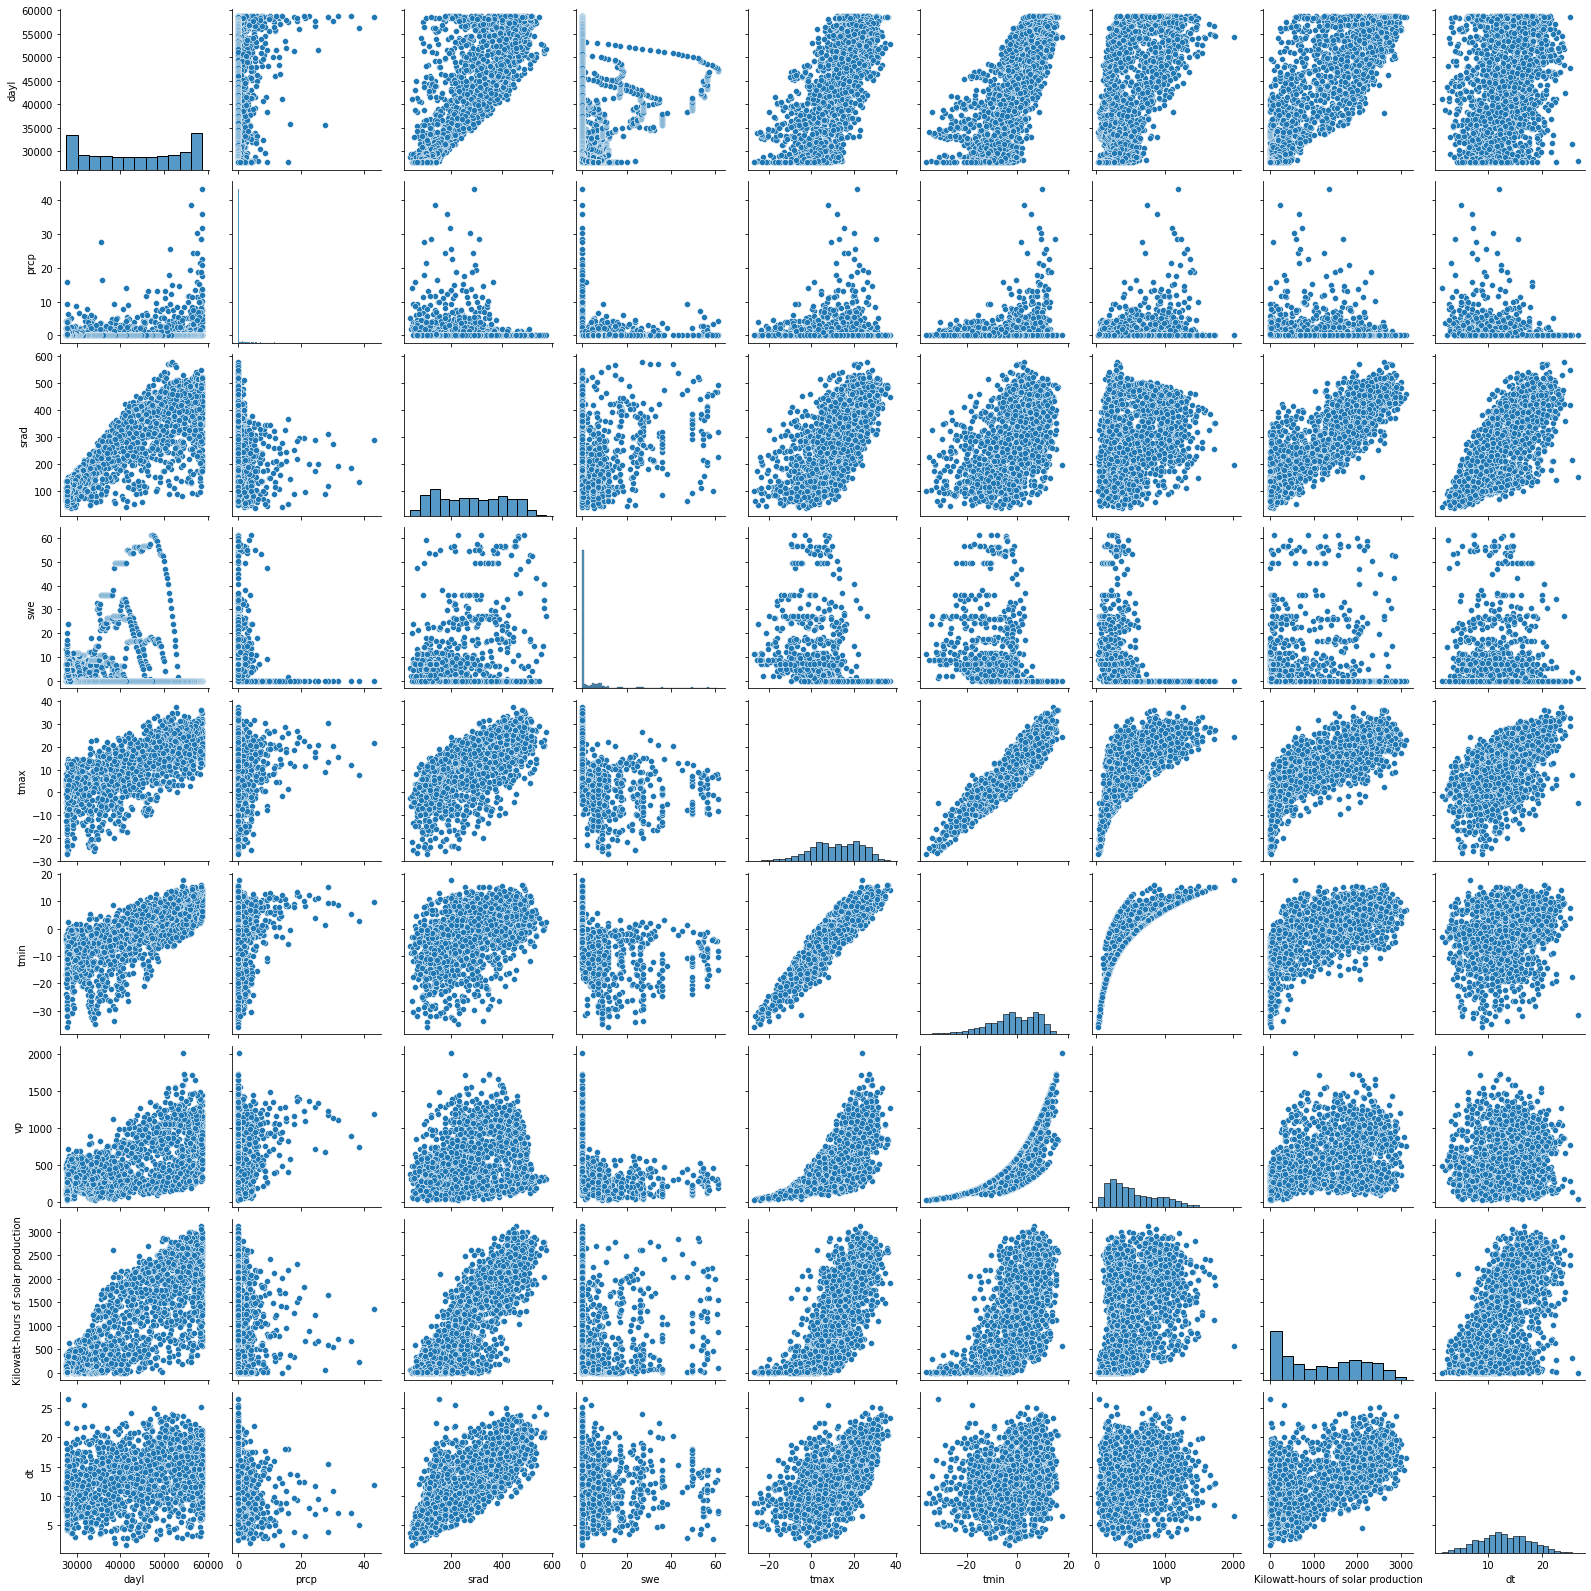

In [114]:
sns.pairplot(df_merged)
plt.show()

In [115]:
# Check the correlation between the variables
df_merged.corr()

,dayl,prcp,srad,swe,tmax,tmin,vp,Kilowatt-hours of solar production,dt
dayl,1.000000,0.195217,0.777023,-0.180386,0.715435,0.727051,0.566907,0.785472,0.299085
prcp,0.195217,1.000000,-0.175705,-0.063720,0.035223,0.155267,0.238091,-0.091066,-0.242929
srad,0.777023,-0.175705,1.000000,-0.008778,0.676765,0.497899,0.244789,0.855140,0.692360
swe,-0.180386,-0.063720,-0.008778,1.000000,-0.426245,-0.445181,-0.383952,-0.217569,-0.152280
tmax,0.715435,0.035223,0.676765,-0.426245,1.000000,0.929394,0.732664,0.777769,0.605331
tmin,0.727051,0.155267,0.497899,-0.445181,0.929394,1.000000,0.836667,0.672927,0.268807
vp,0.566907,0.238091,0.244789,-0.383952,0.732664,0.836667,1.000000,0.439525,0.107651
Kilowatt-hours of solar production,0.785472,-0.091066,0.855140,-0.217569,0.777769,0.672927,0.439525,1.000000,0.578479
dt,0.299085,-0.242929,0.692360,-0.152280,0.605331,0.268807,0.107651,0.578479,1.000000


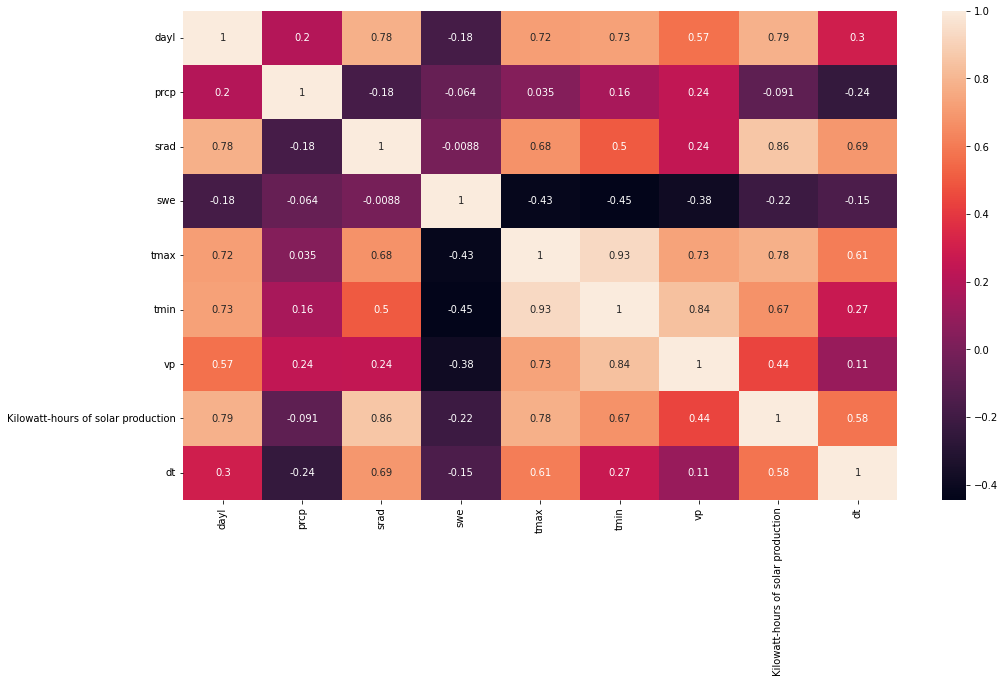

In [116]:
sns.heatmap(df_merged.corr(), annot=True)
plt.show()

In [117]:
# Split the data to train, validation and test splits for selecting the features

X_train, X_test, y_train, y_test = train_test_split(df_merged.drop(['date','Kilowatt-hours of solar production'], axis=1), df_merged['Kilowatt-hours of solar production'], test_size=0.2, random_state=42,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,shuffle=True)

Feature dayl: 1923.5188313278722
Feature prcp: 7.624384270682613
Feature srad: 3413.940881089424
Feature swe: 61.527675547914406
Feature tmax: 1827.9625776015082
Feature tmin: 952.8089034015628
Feature vp: 286.1092627922092
Feature dt: 655.0684044415165


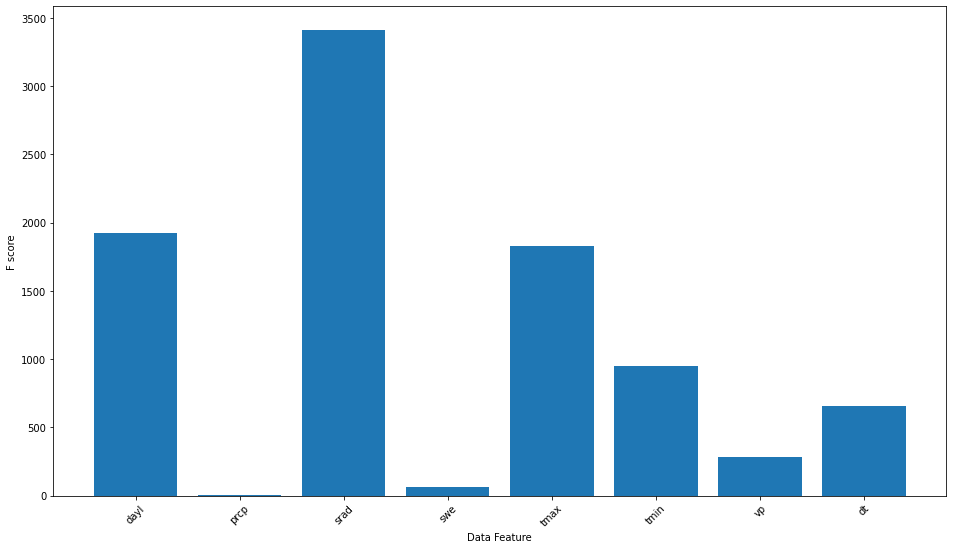

In [118]:
# feature selection
def select_features(X_train, y_train,score_func):
    
    fs = SelectKBest(score_func, k='all')
    fs.fit(X_train, y_train)
    for i in range(len(fs.scores_)):
	    print(f'Feature {X_train.columns[i]}: {fs.scores_[i]}')

    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.ylabel('F score')
    plt.xlabel('Data Feature')
    plt.xticks([i for i in range(len(fs.scores_))], X_train.columns, rotation=45)
    plt.show()
   
    return 

select_features(X_train, y_train,f_regression)


In [119]:
X=df_merged.drop(['date','Kilowatt-hours of solar production','prcp','tmin'], axis=1)
X.columns

Index(['dayl', 'srad', 'swe', 'tmax', 'vp', 'dt'], dtype='object')

In [120]:
# Split data to train, validation and test splits

X_train, X_test, y_train, y_test = train_test_split(X, df_merged['Kilowatt-hours of solar production'], test_size=0.2, random_state=42,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,shuffle=True)

print(f'X_train.shape: {X_train.shape}')
print(f'X_val.shape: {X_val.shape}')
print(f'X_test.shape: {X_test.shape}')

X_train.shape: (1129, 6)
X_val.shape: (283, 6)
X_test.shape: (353, 6)


In [121]:
#Scaling numeric features 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_val=sc.transform(X_val)
X_test=sc.transform(X_test)

In [137]:
# Train the base models 
def test_base_models(model):
 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    model_name= model.__class__.__name__
    return model_name, round(r2_score(y_val, y_pred),3), round(mean_absolute_error(y_val, y_pred),2), round(np.sqrt(mean_squared_error(y_val, y_pred)),2)

base_models=[ RandomForestRegressor(), LinearRegression(),  SVR(kernel="linear")]
score=[]
for model in base_models:
    score.append(test_base_models(model))

pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])

,Model,Score,MAE,RMSE
0,RandomForestRegressor,0.776,295.23,413.68
1,LinearRegression,0.761,325.89,427.04
2,SVR,0.757,335.26,430.76


In [123]:
# Tuning the model

param_grid = {'n_estimators': [50,  80,100,200,250],  
              'bootstrap': [True],
              'max_features': [ 'sqrt','auto'],
              'min_samples_leaf': [1, 3],
              'min_samples_split': [ 5, 10],
              }
                         
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, refit = True, verbose = 3,cv=10) 

grid_result=grid.fit(X_train, y_train)
best_params=grid_result.best_params_
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_val)

print(f'Score: {r2_score(y_val, y_pred)}')
print(f'MAE: {mean_absolute_error(y_val, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_val, y_pred))}')
print(f'best parameters: {best_params}')


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.867 total time=   0.0s
[CV 2/10] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.897 total time=   0.0s
[CV 3/10] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.894 total time=   0.0s
[CV 4/10] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.838 total time=   0.0s
[CV 5/10] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.840 total time=   0.0s
[CV 6/10] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.864 total time=   0.0s
[CV 7/10] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=

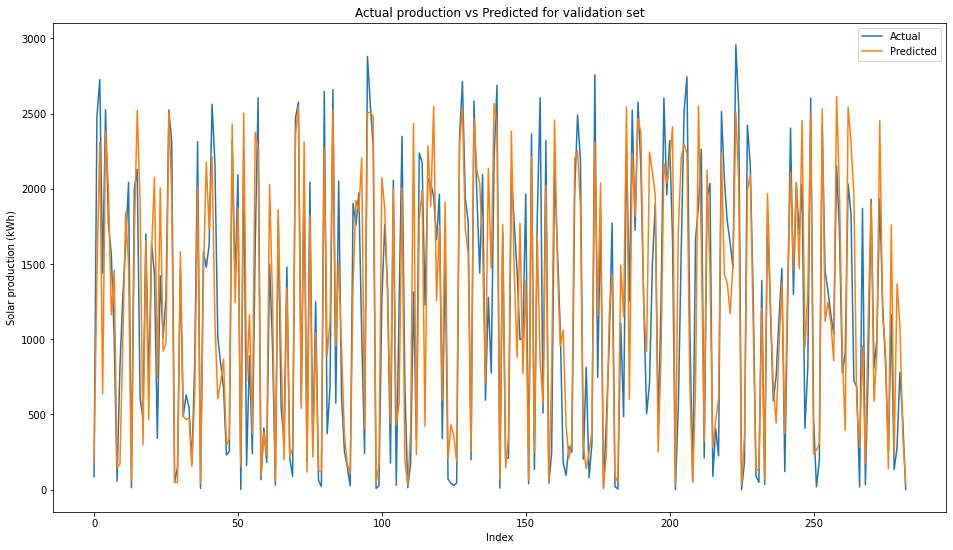

In [124]:
plt.plot(np.array(y_val))
plt.plot(np.array(y_pred))
plt.legend(['Actual','Predicted'])
plt.xlabel('Index')
plt.title('Actual production vs Predicted for validation set')
plt.ylabel('Solar production (kWh)')
plt.show()

In [125]:
# test the model on test set
y_pred_test = best_model.predict(X_test)

print(f'Score: {r2_score(y_test, y_pred_test)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_test)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}')

Score: 0.8152265305127487
MAE: 284.85150595840656
RMSE: 392.6242806447872


In [135]:
y_pred_train = best_model.predict(X_train)

print(f'Score: {r2_score(y_train, y_pred_train)}')
print(f'MAE: {mean_absolute_error(y_train, y_pred_train)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}')

Score: 0.9427064661675109
MAE: 162.92391779726756
RMSE: 222.7680610114194


In [136]:
y_pred_val = best_model.predict(X_val)

print(f'Score: {r2_score(y_val, y_pred_val)}')
print(f'MAE: {mean_absolute_error(y_val, y_pred_val)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_val))}')

Score: 0.7840145144872034
MAE: 293.63389028108253
RMSE: 405.9824919207279


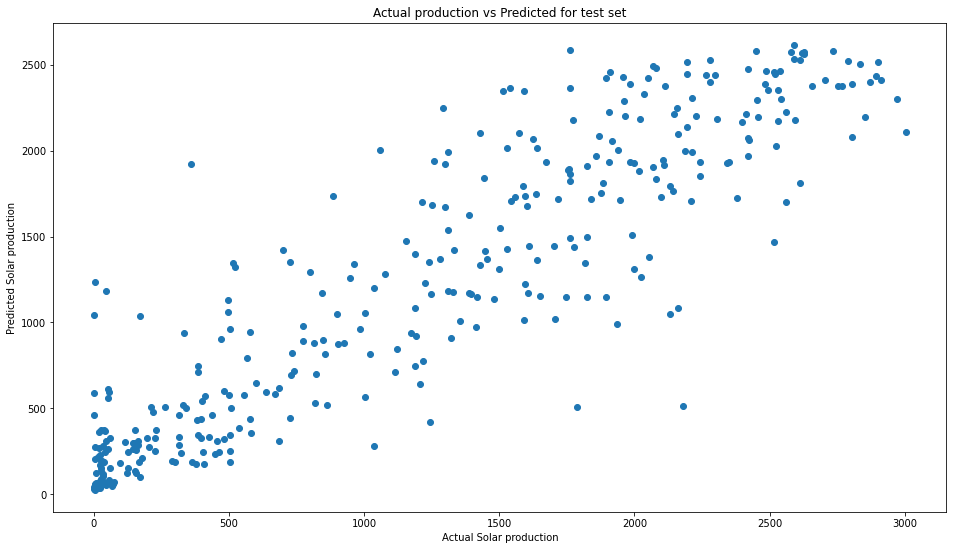

In [126]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual Solar production')
plt.ylabel('Predicted Solar production')
plt.title('Actual production vs Predicted for test set')
plt.show()

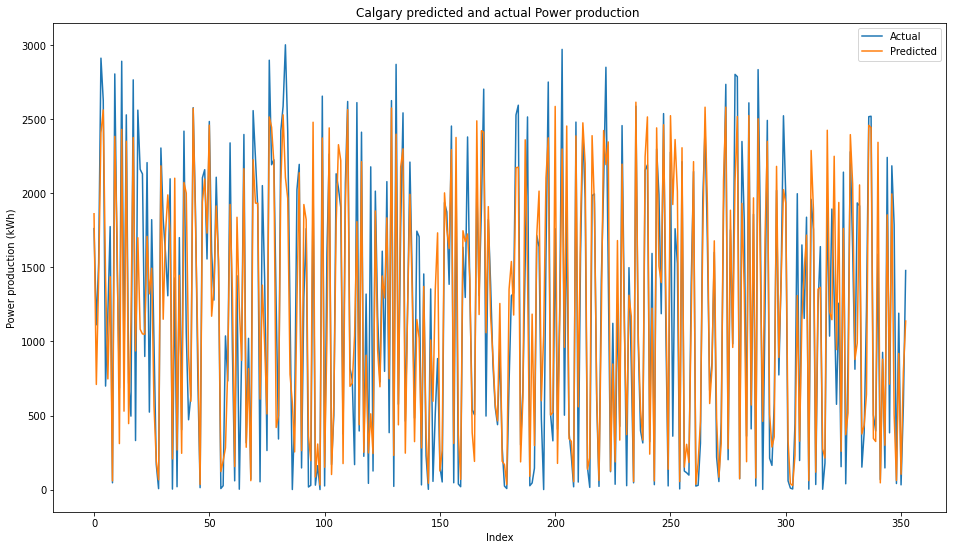

In [127]:
plt.plot(np.array(y_test))
plt.plot(np.array(y_pred_test))
plt.legend(['Actual','Predicted'])
plt.xlabel('Index')
plt.ylabel('Power production (kWh)')
plt.title('Calgary predicted and actual Power production ')
plt.show()

In [128]:
#Load the Seattle and Phoenix data
df_seattle=pd.read_excel('RE_SolarProductionWeatherCase.xlsx', sheet_name='Weather Seattle, WA')
df_phoenix=pd.read_excel('RE_SolarProductionWeatherCase.xlsx', sheet_name='Weather Phoenix, AZ')

In [129]:
# Add dt to the dataframes
df_seattle['dt']=df_seattle['tmax']-df_seattle['tmin']
df_phoenix['dt']=df_phoenix['tmax']-df_phoenix['tmin']
#Select the features we want to use
X_seattle=df_seattle[['dayl', 'srad', 'swe', 'tmax', 'vp', 'dt']]
X_phoenix=df_phoenix[['dayl', 'srad', 'swe', 'tmax', 'vp', 'dt']]

In [130]:
#Apply standard scalar to the data
X_seattle=sc.transform(X_seattle)
X_phoenix=sc.transform(X_phoenix)
#Predict the production for the seattle and Phoenix 
y_seattle = best_model.predict(X_seattle)
y_phoenix = best_model.predict(X_phoenix)

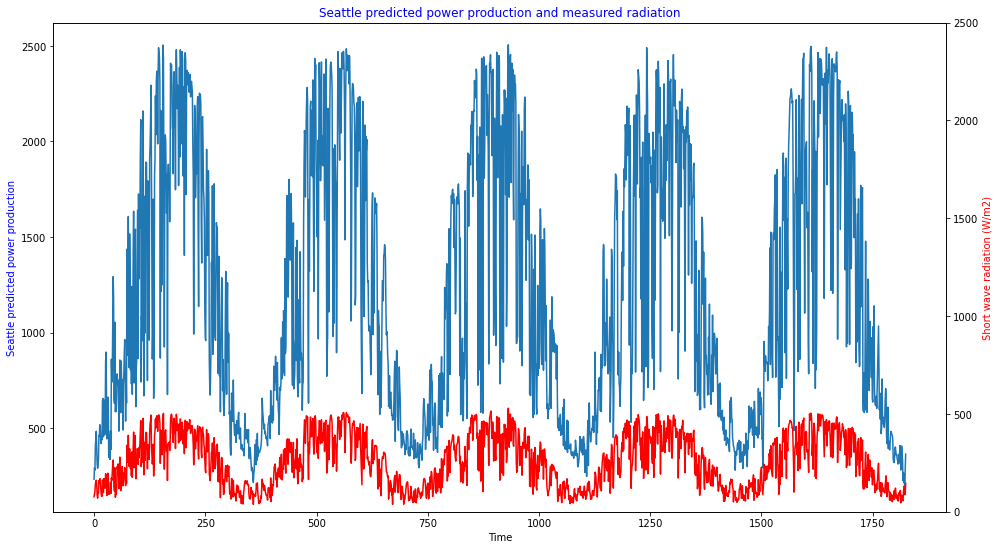

In [131]:

fig,ax1=plt.subplots()
ax1.plot(y_seattle)
ax2=ax1.twinx()
ax2.plot(df_seattle['srad'],color='r')
ax2.set_ylim(0,2500)
ax1.set_xlabel('Time')
ax1.set_ylabel('Seattle predicted power production',color='b')
ax2.set_ylabel('Short wave radiation (W/m2)',color='r')
plt.title('Seattle predicted power production and measured radiation',color='b')
plt.show()

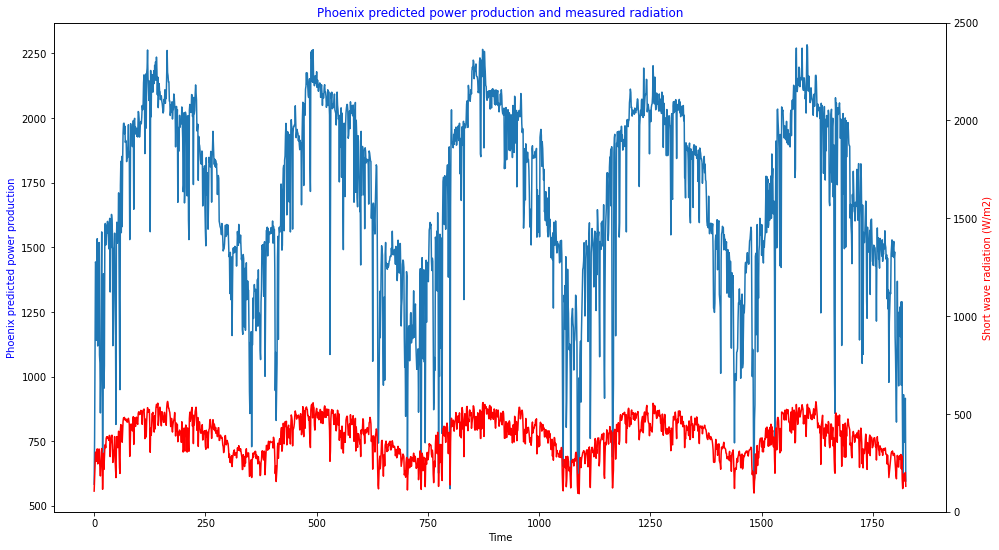

In [132]:
fig,ax1=plt.subplots()
ax1.plot(y_phoenix)
ax2=ax1.twinx()
ax2.plot(df_phoenix['srad'],color='r')
ax2.set_ylim(0,2500)
ax1.set_xlabel('Time')
ax1.set_ylabel('Phoenix predicted power production',color='b')
ax2.set_ylabel('Short wave radiation (W/m2)',color='r')
plt.title('Phoenix predicted power production and measured radiation',color='b')
plt.show()

In [133]:
print(f'Total predicted solar production for Seattle:{round(y_seattle.sum())} kWh')
print(f'Total predicted solar production for Phoenix:{round(y_phoenix.sum())} kWh')
print(f'Total predicted solar production for Phoenix is {round((y_phoenix.sum()-y_seattle.sum())/y_seattle.sum()*100,2)} % more than Seattle ')

Total predicted solar production for Seattle:2238896 kWh
Total predicted solar production for Phoenix:3100944 kWh
Total predicted solar production for Phoenix is 38.5 % more than Seattle 


Text(0.5, 0, 'City')

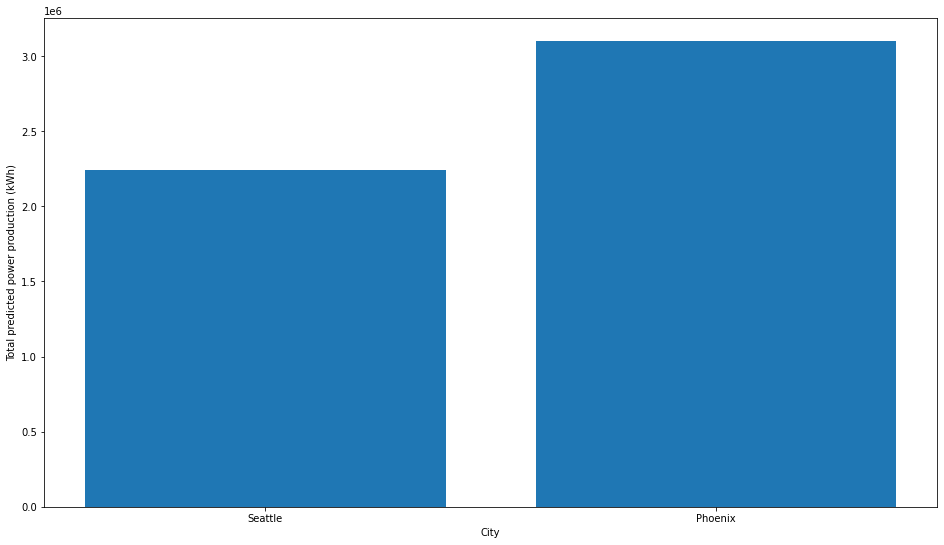

In [134]:
plt.bar(['Seattle', 'Phoenix'],[y_seattle.sum(),y_phoenix.sum()])
plt.ylabel('Total predicted power production (kWh)')
plt.xlabel('City')